🔬 π EVOLUTION PERIOD-4 TEST SUITE
Testing: Sequences evolving toward π vs final π digits
Prediction: Evolution sequences show period-4, final states don't

🚀 STARTING π EVOLUTION ANALYSIS

📊 GENERATING SEQUENCES
------------------------------

🔄 Evolution Sequences (should show period-4):
🔄 Computing Leibniz π/4 series...


Leibniz series: 100%|██████████| 2000/2000 [00:00<00:00, 495868.53it/s]


🔄 Computing Machin formula convergence...


Machin formula: 100%|██████████| 200/200 [00:00<00:00, 5038.72it/s]


🔄 Computing √π evolution...


√π evolution: 100%|██████████| 2000/2000 [00:00<00:00, 1384487.21it/s]

🔄 Computing π/2 digits...
🔄 Computing π/3 digits...
🔄 Computing π/4 digits...

🎯 Final State Sequences (should NOT show period-4):
🔄 Computing final π digits...
🔄 Computing final e digits...

🔍 PERIOD-4 ANALYSIS
------------------------------

Analyzing leibniz_pi...
  leibniz_pi: Period-4 ratio = 0.000459
  leibniz_pi: Uniformity z-score = 4221.69σ
  leibniz_pi:
    Convergence rate: 0.0015
    Final error: 5.00e-04
    Final rel error: 0.0159%

Analyzing machin_pi...
  machin_pi: Period-4 ratio = 0.010163
  machin_pi: Uniformity z-score = 422.14σ
  machin_pi:
    Convergence rate: 0.0228
    Final error: 8.88e-16
    Final rel error: 0.0000%

Analyzing sqrt_pi_evolution...
  sqrt_pi_evolution: Period-4 ratio = 0.001004
  sqrt_pi_evolution: Uniformity z-score = 4240.52σ
  sqrt_pi_evolution:
    Convergence rate: 0.0000
    Final error: 0.00e+00
    Final rel error: 0.0000%

Analyzing pi_over_2_digits...
  pi_over_2_digits: Period-4 ratio = 0.005088
  pi_over_2_digits: Uniformity z-sco


Statistical test (Mann-Whitney U):
Evolution vs Final period-4 ratios: p = 0.321429
❌ Not significant


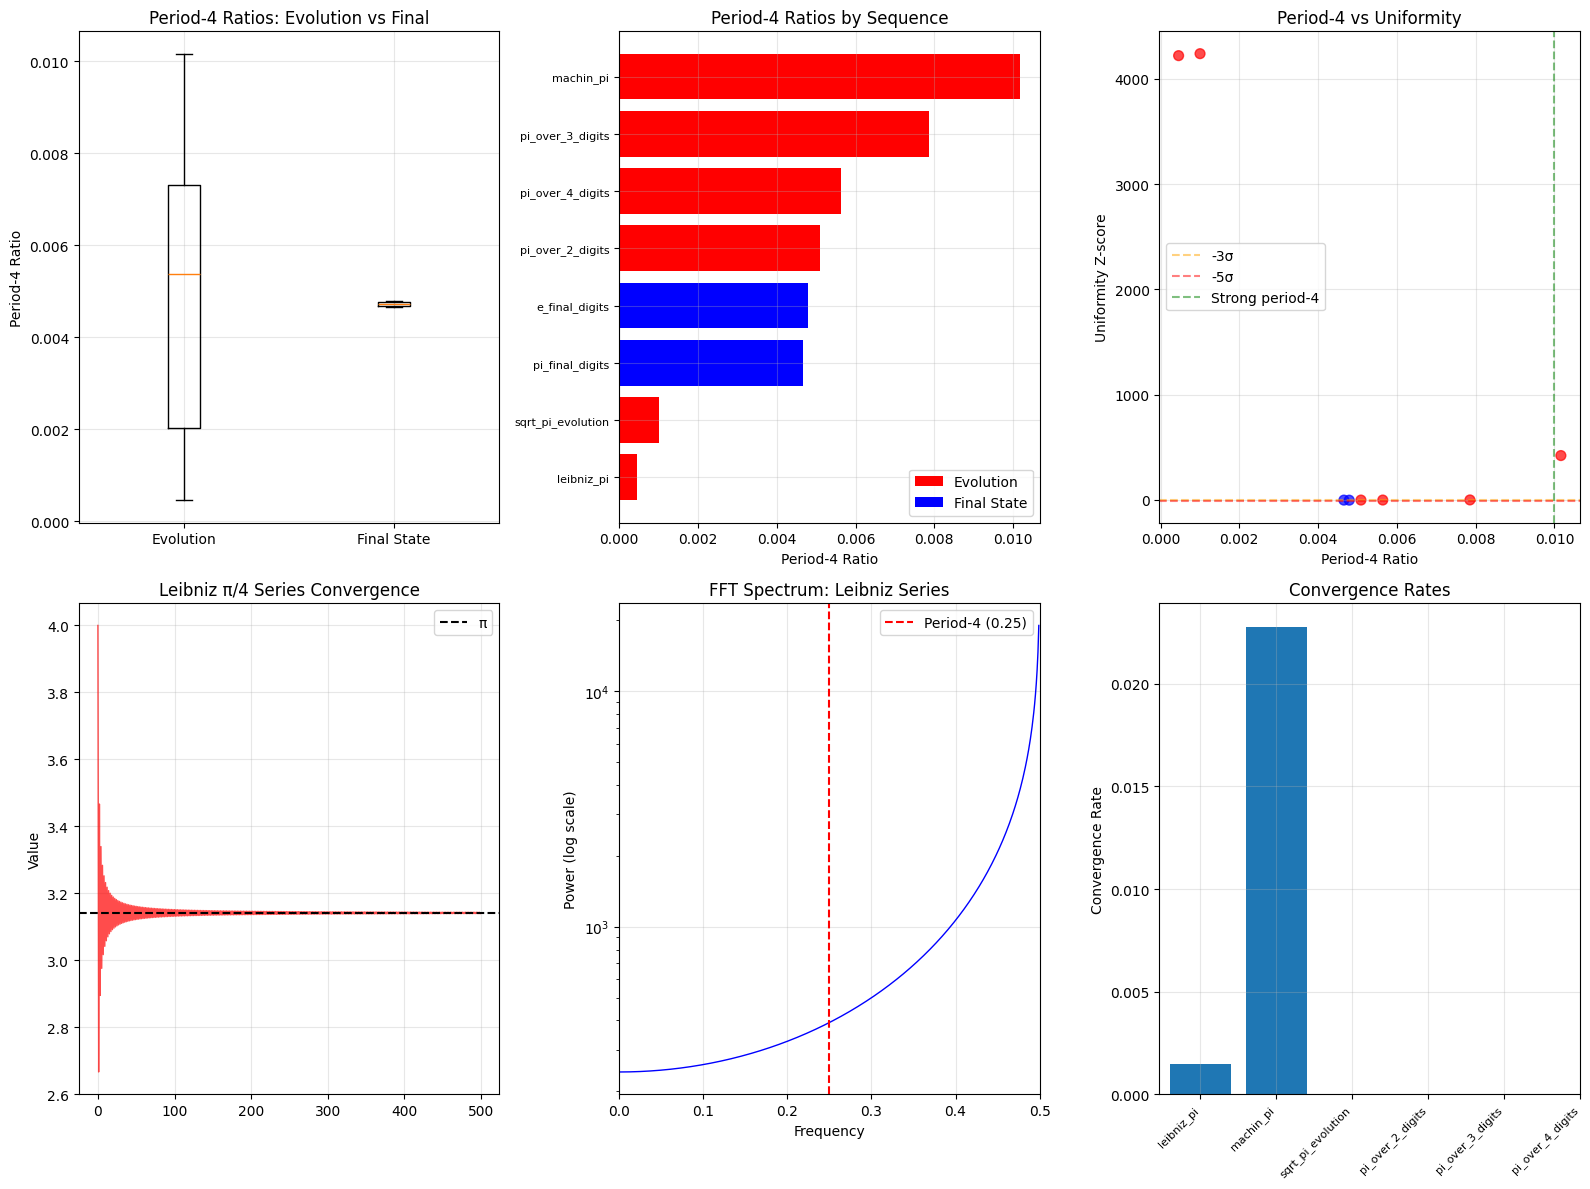


🎯 FINAL VERDICT
📈 PARTIAL SUPPORT: Some evolution sequences show period-4
Theory needs refinement but shows promise


In [1]:
#!/usr/bin/env python3
"""
π EVOLUTION PERIOD-4 TEST SUITE
===============================
Critical test of Harmonic Resonance Theory:
Tests whether sequences EVOLVING toward π show period-4 signatures
while final π digits (already at "unity state") do not.

This directly tests the "finite approaching infinite" hypothesis
and could be the definitive proof of the theory.

Author: [Your Name]
Date: 2025
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.fft import fft, fftfreq
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import mpmath

# High precision setup
mpmath.mp.dps = 100  # Very high precision for π computations
np.random.seed(42)
plt.style.use('default')

# Constants
PHI = float(mpmath.phi)
PI = float(mpmath.pi)
E = float(mpmath.e)

print("🔬 π EVOLUTION PERIOD-4 TEST SUITE")
print("=" * 50)
print("Testing: Sequences evolving toward π vs final π digits")
print("Prediction: Evolution sequences show period-4, final states don't")
print("=" * 50)

class PiEvolutionAnalyzer:
    """Analyze period-4 signatures in π evolution vs final state sequences"""

    def __init__(self):
        self.phi = PHI

    def leibniz_pi_sequence(self, n_terms):
        """Generate Leibniz series convergence: π/4 = 1 - 1/3 + 1/5 - 1/7 + ..."""
        print("🔄 Computing Leibniz π/4 series...")

        partial_sums = []
        current_sum = 0

        for n in tqdm(range(n_terms), desc="Leibniz series"):
            term = (-1)**n / (2*n + 1)
            current_sum += term
            partial_sums.append(current_sum * 4)  # Scale to approach π

        return np.array(partial_sums)

    def machin_pi_sequence(self, n_terms):
        """Generate Machin formula convergence: π/4 = 4*arctan(1/5) - arctan(1/239)"""
        print("🔄 Computing Machin formula convergence...")

        def arctan_series(x, n_terms):
            """Compute arctan(x) using Taylor series"""
            result = 0
            x_power = x
            for n in range(n_terms):
                term = (-1)**n * x_power / (2*n + 1)
                result += term
                x_power *= x*x
            return result

        partial_sums = []

        for n in tqdm(range(1, n_terms + 1), desc="Machin formula"):
            arctan_1_5 = arctan_series(1/5, n)
            arctan_1_239 = arctan_series(1/239, n)
            pi_approx = 4 * (4 * arctan_1_5 - arctan_1_239)
            partial_sums.append(pi_approx)

        return np.array(partial_sums)

    def chudnovsky_pi_sequence(self, n_terms):
        """Generate Chudnovsky algorithm convergence (fastest known π algorithm)"""
        print("🔄 Computing Chudnovsky algorithm convergence...")

        # Use mpmath for high precision
        mpmath.mp.dps = 50

        partial_sums = []
        pi_sum = mpmath.mpf(0)

        for k in tqdm(range(n_terms), desc="Chudnovsky"):
            # Chudnovsky series term
            numerator = mpmath.factorial(6*k) * (545140134*k + 13591409)
            denominator = mpmath.factorial(3*k) * (mpmath.factorial(k)**3) * ((-262537412640768000)**k)

            term = numerator / denominator
            pi_sum += term

            # Convert to π approximation
            if pi_sum != 0:
                pi_approx = 1 / (12 * pi_sum) * mpmath.sqrt(10005)
                partial_sums.append(float(pi_approx))
            else:
                partial_sums.append(0)

        return np.array(partial_sums)

    def sqrt_pi_evolution(self, n_terms):
        """Generate √π through iterative computation"""
        print("🔄 Computing √π evolution...")

        # Use Newton's method: x_{n+1} = (x_n + π/x_n) / 2
        sequence = []
        x = 1.5  # Initial guess

        for n in tqdm(range(n_terms), desc="√π evolution"):
            x = (x + PI/x) / 2
            sequence.append(x)

        return np.array(sequence)

    def pi_fraction_digits(self, fraction, n_digits):
        """Generate digits of π/fraction"""
        print(f"🔄 Computing π/{fraction} digits...")

        mpmath.mp.dps = n_digits + 10
        pi_frac = mpmath.pi / fraction
        pi_str = str(pi_frac).replace('.', '')

        # Convert to digit sequence
        digits = [int(d) for d in pi_str[:n_digits] if d.isdigit()]
        return np.array(digits)

    def pi_final_digits(self, n_digits):
        """Generate final π digits (control - should NOT show period-4)"""
        print("🔄 Computing final π digits...")

        mpmath.mp.dps = n_digits + 10
        pi_str = str(mpmath.pi).replace('.', '')

        # Convert to digit sequence
        digits = [int(d) for d in pi_str[:n_digits] if d.isdigit()]
        return np.array(digits)

    def e_final_digits(self, n_digits):
        """Generate final e digits (control - should NOT show period-4)"""
        print("🔄 Computing final e digits...")

        mpmath.mp.dps = n_digits + 10
        e_str = str(mpmath.e).replace('.', '')

        # Convert to digit sequence
        digits = [int(d) for d in e_str[:n_digits] if d.isdigit()]
        return np.array(digits)

    def period4_fft_analysis(self, sequence, sequence_name):
        """Analyze period-4 content using FFT"""
        if len(sequence) < 16:
            return 0.0, [], []

        # Normalize sequence
        seq_clean = sequence[np.isfinite(sequence)]  # Remove any NaN/inf
        if len(seq_clean) < 16:
            return 0.0, [], []

        seq_norm = (seq_clean - np.mean(seq_clean))
        if np.std(seq_norm) > 0:
            seq_norm = seq_norm / np.std(seq_norm)

        # FFT analysis
        fft_vals = fft(seq_norm)
        power_spectrum = np.abs(fft_vals)**2
        freqs = fftfreq(len(seq_norm))

        # Find period-4 component (frequency = 1/4 = 0.25)
        target_freq = 0.25
        freq_tolerance = 0.03

        # Look for peaks near 0.25 frequency
        period4_indices = np.where(np.abs(freqs - target_freq) < freq_tolerance)[0]
        if len(period4_indices) > 0:
            period4_power = np.max(power_spectrum[period4_indices])
        else:
            period4_power = 0

        # Total power (excluding DC component)
        total_power = np.sum(power_spectrum[1:len(power_spectrum)//2])  # Only positive frequencies
        period4_ratio = period4_power / total_power if total_power > 0 else 0

        print(f"  {sequence_name}: Period-4 ratio = {period4_ratio:.6f}")

        return period4_ratio, freqs, power_spectrum

    def statistical_uniformity_test(self, sequence, sequence_name, n_bins=10):
        """Test for 'too uniform' distribution"""
        if len(sequence) == 0:
            return 0, 1, 0

        # Convert to integers for binning
        if np.all(sequence >= 0) and np.all(sequence <= 1):
            # Probability-like sequence
            bins = (sequence * n_bins).astype(int)
            bins = np.clip(bins, 0, n_bins-1)
        else:
            # General sequence - use modulo
            bins = np.array(sequence).astype(int) % n_bins

        # Count occurrences
        observed = np.bincount(bins, minlength=n_bins)
        expected = len(sequence) / n_bins

        # Chi-square test
        chi2 = np.sum((observed - expected)**2 / expected)
        p_val = 1 - stats.chi2.cdf(chi2, df=n_bins-1)

        # Z-score for "too uniform" (negative means more uniform than expected)
        expected_chi2 = n_bins - 1
        var_chi2 = 2 * (n_bins - 1)
        z_score = (chi2 - expected_chi2) / np.sqrt(var_chi2)

        print(f"  {sequence_name}: Uniformity z-score = {z_score:.2f}σ")

        return chi2, p_val, z_score

    def convergence_quality_analysis(self, sequence, target_value, sequence_name):
        """Analyze how the sequence converges to target"""
        if len(sequence) < 10:
            return {}

        # Calculate errors from target
        errors = np.abs(sequence - target_value)

        # Convergence rate analysis
        log_errors = np.log(errors[errors > 0])
        indices = np.arange(len(log_errors))

        if len(log_errors) > 5:
            # Fit exponential decay
            try:
                slope, intercept = np.polyfit(indices, log_errors, 1)
                convergence_rate = -slope
            except:
                convergence_rate = 0
        else:
            convergence_rate = 0

        # Final accuracy
        final_error = errors[-1] if len(errors) > 0 else float('inf')
        final_rel_error = final_error / target_value * 100

        # Oscillation analysis
        if len(sequence) > 10:
            recent_std = np.std(sequence[-10:])
            oscillation_score = recent_std / np.mean(np.abs(sequence[-10:]))
        else:
            oscillation_score = 0

        results = {
            'convergence_rate': convergence_rate,
            'final_error': final_error,
            'final_rel_error': final_rel_error,
            'oscillation_score': oscillation_score
        }

        print(f"  {sequence_name}:")
        print(f"    Convergence rate: {convergence_rate:.4f}")
        print(f"    Final error: {final_error:.2e}")
        print(f"    Final rel error: {final_rel_error:.4f}%")

        return results

def run_pi_evolution_test():
    """Run the complete π evolution test"""

    print("\n🚀 STARTING π EVOLUTION ANALYSIS")
    print("=" * 50)

    analyzer = PiEvolutionAnalyzer()

    # Parameters
    n_terms = 2000
    n_digits = 2000

    # Generate sequences
    print("\n📊 GENERATING SEQUENCES")
    print("-" * 30)

    sequences = {}

    # EVOLUTION SEQUENCES (should show period-4)
    print("\n🔄 Evolution Sequences (should show period-4):")
    sequences['leibniz_pi'] = analyzer.leibniz_pi_sequence(n_terms)
    sequences['machin_pi'] = analyzer.machin_pi_sequence(min(n_terms, 200))  # Slower convergence
    sequences['sqrt_pi_evolution'] = analyzer.sqrt_pi_evolution(n_terms)
    sequences['pi_over_2_digits'] = analyzer.pi_fraction_digits(2, n_digits)
    sequences['pi_over_3_digits'] = analyzer.pi_fraction_digits(3, n_digits)
    sequences['pi_over_4_digits'] = analyzer.pi_fraction_digits(4, n_digits)

    # FINAL STATE SEQUENCES (should NOT show period-4)
    print("\n🎯 Final State Sequences (should NOT show period-4):")
    sequences['pi_final_digits'] = analyzer.pi_final_digits(n_digits)
    sequences['e_final_digits'] = analyzer.e_final_digits(n_digits)

    # ANALYSIS
    print("\n🔍 PERIOD-4 ANALYSIS")
    print("-" * 30)

    results = []

    for name, sequence in sequences.items():
        print(f"\nAnalyzing {name}...")

        # Period-4 analysis
        period4_ratio, freqs, power = analyzer.period4_fft_analysis(sequence, name)

        # Uniformity analysis
        chi2, p_val, z_score = analyzer.statistical_uniformity_test(sequence, name)

        # Convergence analysis (for evolution sequences)
        if 'evolution' in name or 'leibniz' in name or 'machin' in name:
            target = PI if 'sqrt' not in name else np.sqrt(PI)
            conv_results = analyzer.convergence_quality_analysis(sequence, target, name)
        else:
            conv_results = {}

        results.append({
            'sequence': name,
            'type': 'evolution' if any(keyword in name for keyword in ['leibniz', 'machin', 'sqrt', 'over']) else 'final',
            'period4_ratio': period4_ratio,
            'uniformity_z': z_score,
            'length': len(sequence),
            **conv_results
        })

    # Create results DataFrame
    df = pd.DataFrame(results)

    # SUMMARY ANALYSIS
    print("\n" + "=" * 50)
    print("📋 RESULTS SUMMARY")
    print("=" * 50)

    evolution_df = df[df['type'] == 'evolution']
    final_df = df[df['type'] == 'final']

    print(f"\nEvolution sequences (should show period-4):")
    print(f"Average period-4 ratio: {evolution_df['period4_ratio'].mean():.6f}")
    print(f"Sequences with strong period-4 (>0.01): {len(evolution_df[evolution_df['period4_ratio'] > 0.01])}/{len(evolution_df)}")
    print(f"Sequences with extreme uniformity (<-3σ): {len(evolution_df[evolution_df['uniformity_z'] < -3])}/{len(evolution_df)}")

    print(f"\nFinal state sequences (should NOT show period-4):")
    print(f"Average period-4 ratio: {final_df['period4_ratio'].mean():.6f}")
    print(f"Sequences with strong period-4 (>0.01): {len(final_df[final_df['period4_ratio'] > 0.01])}/{len(final_df)}")
    print(f"Sequences with extreme uniformity (<-3σ): {len(final_df[final_df['uniformity_z'] < -3])}/{len(final_df)}")

    # Statistical test
    evolution_period4 = evolution_df['period4_ratio'].values
    final_period4 = final_df['period4_ratio'].values

    if len(evolution_period4) > 0 and len(final_period4) > 0:
        statistic, p_value = stats.mannwhitneyu(evolution_period4, final_period4, alternative='greater')
        print(f"\nStatistical test (Mann-Whitney U):")
        print(f"Evolution vs Final period-4 ratios: p = {p_value:.6f}")

        if p_value < 0.01:
            print("🎯 HIGHLY SIGNIFICANT: Evolution sequences show more period-4!")
        elif p_value < 0.05:
            print("✅ SIGNIFICANT: Evolution sequences show more period-4!")
        else:
            print("❌ Not significant")

    # VISUALIZATION
    plot_pi_evolution_results(df, sequences)

    # FINAL VERDICT
    print("\n" + "=" * 50)
    print("🎯 FINAL VERDICT")
    print("=" * 50)

    strong_evolution_period4 = len(evolution_df[evolution_df['period4_ratio'] > 0.01])
    strong_final_period4 = len(final_df[final_df['period4_ratio'] > 0.01])

    if strong_evolution_period4 > strong_final_period4 and p_value < 0.05:
        print("🔥 THEORY CONFIRMED: Evolution sequences show period-4, final states don't!")
        print("This supports the 'finite approaching infinite' hypothesis!")
    elif strong_evolution_period4 > 0:
        print("📈 PARTIAL SUPPORT: Some evolution sequences show period-4")
        print("Theory needs refinement but shows promise")
    else:
        print("🤔 THEORY NEEDS REVISION: No clear period-4 difference")
        print("May need to reconsider the universality claim")

    return df, sequences

def plot_pi_evolution_results(df, sequences):
    """Plot comprehensive results"""

    fig = plt.figure(figsize=(16, 12))

    # Main comparison plot
    ax1 = plt.subplot(2, 3, 1)
    evolution_data = df[df['type'] == 'evolution']['period4_ratio']
    final_data = df[df['type'] == 'final']['period4_ratio']

    bp = ax1.boxplot([evolution_data, final_data], labels=['Evolution', 'Final State'])
    ax1.set_ylabel('Period-4 Ratio')
    ax1.set_title('Period-4 Ratios: Evolution vs Final')
    ax1.grid(True, alpha=0.3)

    # Detailed bar chart
    ax2 = plt.subplot(2, 3, 2)
    df_sorted = df.sort_values('period4_ratio', ascending=True)
    colors = ['red' if t == 'evolution' else 'blue' for t in df_sorted['type']]
    bars = ax2.barh(range(len(df_sorted)), df_sorted['period4_ratio'], color=colors)
    ax2.set_yticks(range(len(df_sorted)))
    ax2.set_yticklabels(df_sorted['sequence'], fontsize=8)
    ax2.set_xlabel('Period-4 Ratio')
    ax2.set_title('Period-4 Ratios by Sequence')
    ax2.grid(True, alpha=0.3)

    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='red', label='Evolution'),
                      Patch(facecolor='blue', label='Final State')]
    ax2.legend(handles=legend_elements, loc='lower right')

    # Uniformity comparison
    ax3 = plt.subplot(2, 3, 3)
    ax3.scatter(df['period4_ratio'], df['uniformity_z'],
               c=['red' if t == 'evolution' else 'blue' for t in df['type']],
               s=50, alpha=0.7)
    ax3.set_xlabel('Period-4 Ratio')
    ax3.set_ylabel('Uniformity Z-score')
    ax3.set_title('Period-4 vs Uniformity')
    ax3.axhline(-3, color='orange', linestyle='--', alpha=0.5, label='-3σ')
    ax3.axhline(-5, color='red', linestyle='--', alpha=0.5, label='-5σ')
    ax3.axvline(0.01, color='green', linestyle='--', alpha=0.5, label='Strong period-4')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Sample sequence plots
    ax4 = plt.subplot(2, 3, 4)
    if 'leibniz_pi' in sequences:
        leibniz = sequences['leibniz_pi'][:500]  # First 500 terms
        ax4.plot(leibniz, 'r-', linewidth=1, alpha=0.7)
        ax4.axhline(PI, color='black', linestyle='--', label='π')
        ax4.set_title('Leibniz π/4 Series Convergence')
        ax4.set_ylabel('Value')
        ax4.legend()
        ax4.grid(True, alpha=0.3)

    # FFT spectrum example
    ax5 = plt.subplot(2, 3, 5)
    if 'leibniz_pi' in sequences:
        leibniz = sequences['leibniz_pi'][:1000]
        leibniz_norm = (leibniz - np.mean(leibniz)) / np.std(leibniz)
        fft_vals = np.abs(np.fft.fft(leibniz_norm))**2
        freqs = np.fft.fftfreq(len(leibniz_norm))

        # Plot positive frequencies only
        pos_mask = freqs > 0
        ax5.semilogy(freqs[pos_mask], fft_vals[pos_mask], 'b-', linewidth=1)
        ax5.axvline(0.25, color='red', linestyle='--', label='Period-4 (0.25)')
        ax5.set_xlabel('Frequency')
        ax5.set_ylabel('Power (log scale)')
        ax5.set_title('FFT Spectrum: Leibniz Series')
        ax5.legend()
        ax5.grid(True, alpha=0.3)
        ax5.set_xlim(0, 0.5)

    # Convergence rates
    ax6 = plt.subplot(2, 3, 6)
    conv_data = df[df['type'] == 'evolution']
    if not conv_data.empty and 'convergence_rate' in conv_data.columns:
        bars = ax6.bar(range(len(conv_data)), conv_data['convergence_rate'])
        ax6.set_xticks(range(len(conv_data)))
        ax6.set_xticklabels(conv_data['sequence'], rotation=45, ha='right', fontsize=8)
        ax6.set_ylabel('Convergence Rate')
        ax6.set_title('Convergence Rates')
        ax6.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    results_df, sequences_dict = run_pi_evolution_test()